# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

In [1]:
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

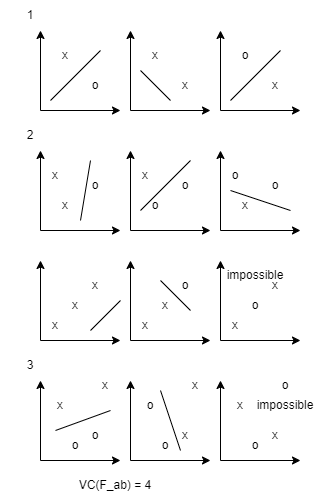

### b)

In [2]:
model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)

In [3]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    all_products = np.array(list(product([0, 1], repeat=n)))
    unique_products = all_products[:int(len(all_products)/2)]
    for y in unique_products:
        if all(y == 1) or all(y == 0):
            continue
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n, y)
        if model.score(S_n, y) != 1:
            return False
    
    return True

In [4]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes switched)

from itertools import combinations
from itertools import permutations
from itertools import product

### c)

In [5]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [6]:
np.c_[[1, 2], [3, 4]]

array([[1, 3],
       [2, 4]])

In [7]:
def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

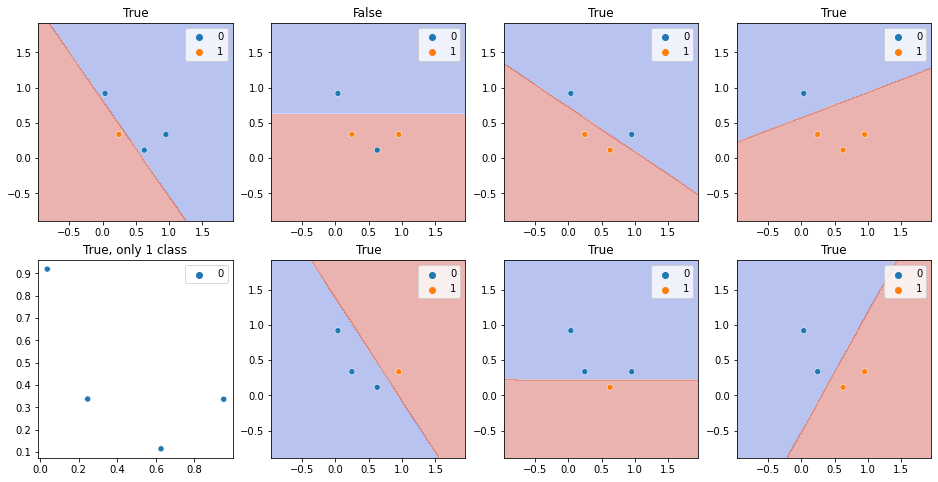

In [8]:
n = 4
d = 2
S_n = np.random.uniform(size=(n, d))

minx, maxx, miny, maxy = min(S_n[:, 0])-1, max(S_n[:, 0])+1, min(S_n[:, 1])-1, max(S_n[:, 1])+1
xspace = np.linspace(minx, maxx, num=200)
yspace = np.linspace(miny, maxy, num=200)
xx, yy = np.meshgrid(np.expand_dims(xspace, axis=1), np.expand_dims(yspace, axis=1))

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
all_products = np.array(list(product([0, 1], repeat=n)))
unique_products = all_products[:int(len(all_products)/2)]
x = np.linspace(0, 1, 100)
for i, y in enumerate(unique_products):
    if all(y == 1) or all(y == 0):
        sns.scatterplot(x=S_n[:, 0], y=S_n[:, 1], hue=y, ax=axs[int(i <4)][i%4])
        axs[int(i <4)][i%4].title.set_text('True, only 1 class')
        continue
    model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    model.fit(S_n, y)
    
    axs[int(i <4)][i%4].title.set_text(str(model.score(S_n, y) == 1))
    plot_contours(axs[int(i <4)][i%4], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
    sns.scatterplot(x=S_n[:, 0], y=S_n[:, 1], hue=y, ax=axs[int(i <4)][i%4])
    
    sns.lineplot()

plt.show()

### d)

In [9]:
results = {'d': [], 'n': [], 'shattered': []}
for d in range(2, 11):
    print(d)
    for n in range(d, d + 3):
        shattered_count = 0
        for i in range(50):
            S_n = np.random.multivariate_normal([0] * d, np.eye(d), size=n)
            shattered_count += int(is_shattered(d, n, S_n))
        
        results['d'].append(d)
        results['n'].append(n)
        results['shattered'].append(shattered_count)

2
3
4
5
6
7
8
9
10


In [10]:
pd.DataFrame(results)

,d,n,shattered
0,2,2,50
1,2,3,50
2,2,4,0
3,3,3,50
4,3,4,50
5,3,5,0
6,4,4,50
7,4,5,50
8,4,6,0
9,5,5,50


CONCLUSION: if n >= d + 2, we can't shatter at all, so VC = d + 2.

For n = d + 1, we can shatter, except for certain S_n positions

### e)

In [11]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered_balls(d, n, S_n):
    all_products = np.array(list(product([0, 1], repeat=n)))
    unique_products = all_products[:int(len(all_products)/2)]
    for y in unique_products:
        if all(y == 1) or all(y == 0):
            continue
        model = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5)
        model.fit(S_n, y)
        if model.score(S_n, y) != 1:
            return False
    
    return True

In [12]:
# A hint: change a kernel in SVM
results = {'d': [], 'n': [], 'shattered': []}
d=2

for n in range(d, 15):
    print(n)
    shattered_count = 0
    for i in tqdm(range(10)):
        S_n = np.random.multivariate_normal([0] * d, np.eye(d), size=n)
        shattered_count += int(is_shattered_balls(d, n, S_n))

    results['d'].append(d)
    results['n'].append(n)
    results['shattered'].append(shattered_count)

2


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2149.38it/s]


3


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 496.94it/s]


4


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 256.64it/s]


5


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 123.23it/s]


6


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.68it/s]


7


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.70it/s]


8


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.27it/s]


9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.31it/s]


10


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.16it/s]


11


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.18it/s]


12


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.11it/s]


13


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.88s/it]


14


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


In [13]:
pd.DataFrame(results)

,d,n,shattered
0,2,2,10
1,2,3,10
2,2,4,10
3,2,5,10
4,2,6,10
5,2,7,10
6,2,8,10
7,2,9,10
8,2,10,9
9,2,11,10
